In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
K = np.array([[0.00337701],       [0.01549156],
       [0.05065756],
       [0.11808084],
       [0.19620069],
       [0.23238471],
       [0.19620069],
       [0.11808084],
       [0.05065756],
       [0.01549156],
       [0.00337701]])

In [19]:
T = K.T

In [20]:
T

array([[0.00337701, 0.01549156, 0.05065756, 0.11808084, 0.19620069,
        0.23238471, 0.19620069, 0.11808084, 0.05065756, 0.01549156,
        0.00337701]])

In [21]:
k2 = K * T

In [22]:
k2

array([[1.14041965e-05, 5.23151530e-05, 1.71071087e-04, 3.98760177e-04,
        6.62571692e-04, 7.84765490e-04, 6.62571692e-04, 3.98760177e-04,
        1.71071087e-04, 5.23151530e-05, 1.14041965e-05],
       [5.23151530e-05, 2.39988431e-04, 7.84764630e-04, 1.82925642e-03,
        3.03945476e-03, 3.60000168e-03, 3.03945476e-03, 1.82925642e-03,
        7.84764630e-04, 2.39988431e-04, 5.23151530e-05],
       [1.71071087e-04, 7.84764630e-04, 2.56618839e-03, 5.98168724e-03,
        9.93904823e-03, 1.17720424e-02, 9.93904823e-03, 5.98168724e-03,
        2.56618839e-03, 7.84764630e-04, 1.71071087e-04],
       [3.98760177e-04, 1.82925642e-03, 5.98168724e-03, 1.39430848e-02,
        2.31675423e-02, 2.74401818e-02, 2.31675423e-02, 1.39430848e-02,
        5.98168724e-03, 1.82925642e-03, 3.98760177e-04],
       [6.62571692e-04, 3.03945476e-03, 9.93904823e-03, 2.31675423e-02,
        3.84947108e-02, 4.55940404e-02, 3.84947108e-02, 2.31675423e-02,
        9.93904823e-03, 3.03945476e-03, 6.62571692e-

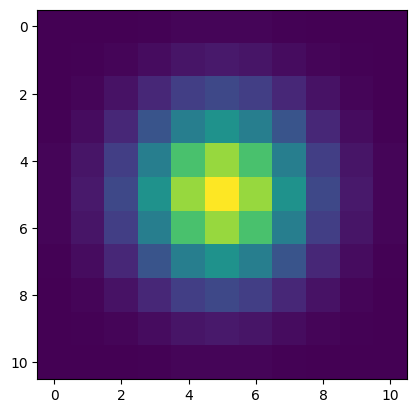

In [25]:
plt.imshow(k2)
plt.show()

In [7]:
kernel = cv2.getGaussianKernel(11, 1.718)

In [8]:
kernel

array([[0.003366  ],
       [0.01546162],
       [0.050612  ],
       [0.11806185],
       [0.19625615],
       [0.23248477],
       [0.19625615],
       [0.11806185],
       [0.050612  ],
       [0.01546162],
       [0.003366  ]])

In [13]:
type(kernel)

numpy.ndarray

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

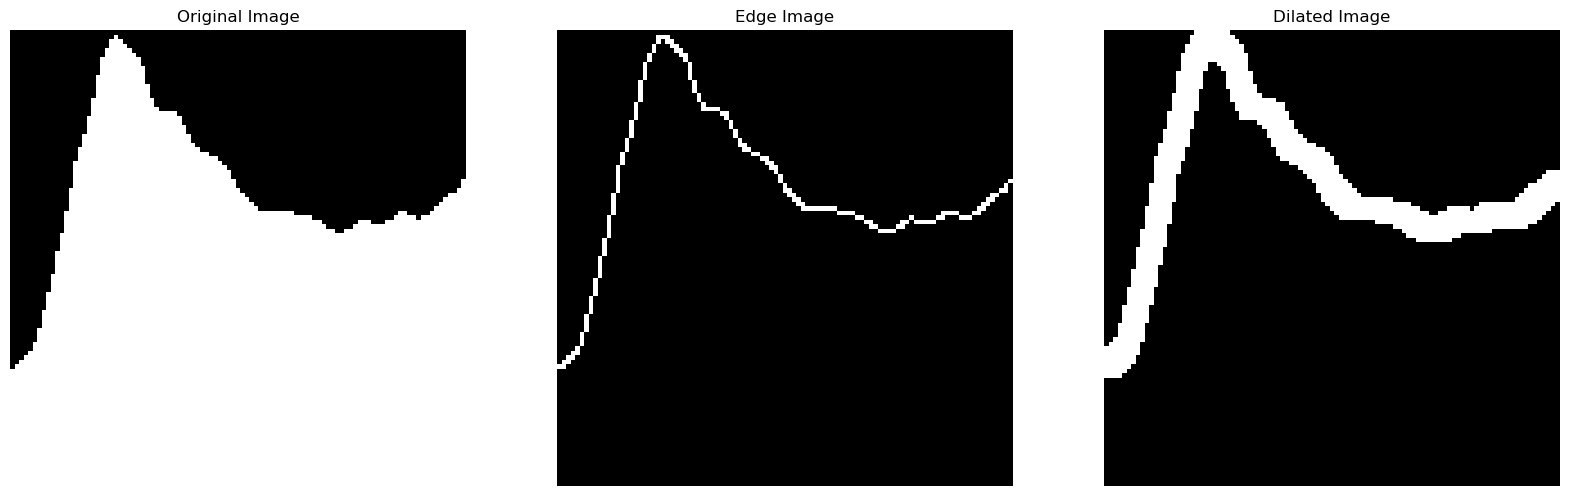

In [4]:
mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(mask,100,200)
kernel = np.ones((5,5))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)
# plt imshow 3 columns
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(mask,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [33]:
sample = cv2.imread("tgs_salt/1bd1c8c771.png")
# Convert original to sample representation.
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
# Convert sample to floating point and normalize to the range [0., 1.]
sample = sample.astype(np.float64)
sample = sample / 255.

# Calculating Masks
semantic_mask = cv2.imread("tgs_salt/1bd1c8c771Mask.png")
semantic_mask = cv2.cvtColor(semantic_mask, cv2.COLOR_BGR2GRAY) 

# Inverting the mask by performing bitwise-not operation
mask_inverted = cv2.bitwise_not(semantic_mask)

edges = cv2.Canny(semantic_mask,100,200)
kernel = np.ones((11,11))
dilated_edge = cv2.dilate(edges, kernel, iterations=1)

semantic_mask = semantic_mask.astype(np.float64)
semantic_mask = semantic_mask / 255.

reduced_semantic_mask = semantic_mask - dilated_edge
reduced_inverted_mask = mask_inverted - dilated_edge

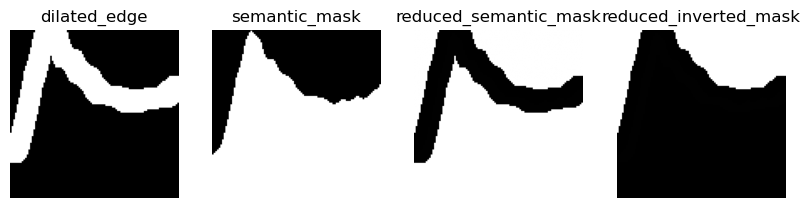

In [36]:
#show dilated_edge, semantic_mask, reduced_semantic_mask, reduced_inverted_mask
plt.figure(figsize=(10,10))
plt.subplot(141),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('dilated_edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(semantic_mask,cmap = 'gray')
plt.title('semantic_mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(reduced_semantic_mask,cmap = 'gray')
plt.title('reduced_semantic_mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(reduced_inverted_mask,cmap = 'gray')
plt.title('reduced_inverted_mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

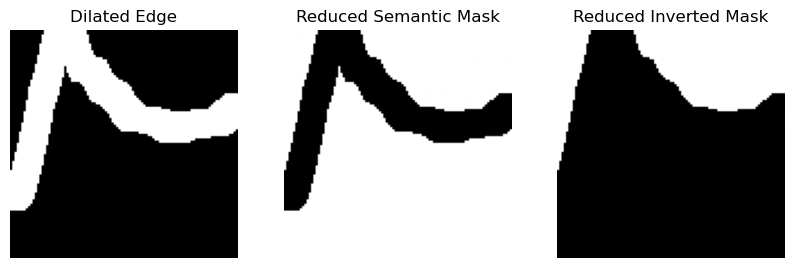

In [34]:
#show dilated edge, reduced_semantic_mask, reduced_inverted_mask
plt.figure(figsize=(10,5))
plt.subplot(131),plt.imshow(dilated_edge,cmap = 'gray')
plt.title('Dilated Edge'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(reduced_semantic_mask,cmap = 'gray')
plt.title('Reduced Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(reduced_inverted_mask,cmap = 'gray')
plt.title('Reduced Inverted Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
sample
sample_dilated_edge = sample * dilated_edge
sample_reduced  = sample * reduced_semantic_mask
sample_inverted = sample * reduced_inverted_mask

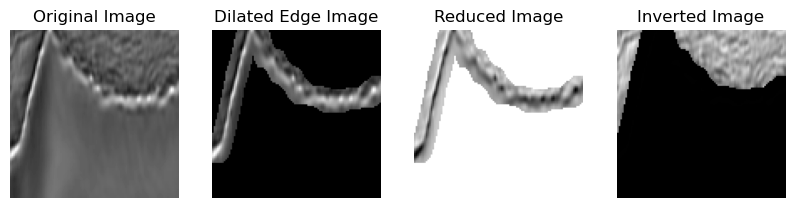

In [30]:
# show sample, dilated_edge_sample, reduced_sample, inverted_sample
plt.figure(figsize=(10,10))
plt.subplot(141),plt.imshow(sample,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(142),plt.imshow(sample_dilated_edge,cmap = 'gray')
plt.title('Dilated Edge Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(143),plt.imshow(sample_reduced,cmap = 'gray')
plt.title('Reduced Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(144),plt.imshow(sample_inverted,cmap = 'gray')
plt.title('Inverted Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

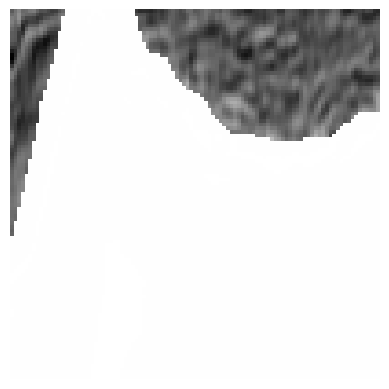

In [32]:
diff = sample - sample_inverted
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
sample

array([[0.36862745, 0.31372549, 0.27058824, ..., 0.42352941, 0.4745098 ,
        0.48235294],
       [0.32941176, 0.30588235, 0.25098039, ..., 0.4745098 , 0.48627451,
        0.45882353],
       [0.29411765, 0.30980392, 0.25098039, ..., 0.4745098 , 0.45098039,
        0.41176471],
       ...,
       [0.21568627, 0.20392157, 0.18823529, ..., 0.39215686, 0.38039216,
        0.38039216],
       [0.21568627, 0.21176471, 0.18823529, ..., 0.38823529, 0.38039216,
        0.38039216],
       [0.21568627, 0.21176471, 0.19607843, ..., 0.38823529, 0.38039216,
        0.38039216]])

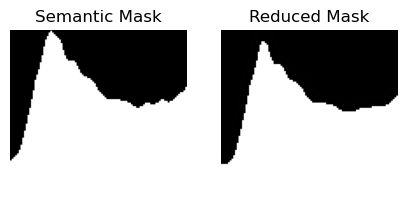

In [58]:
plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(semantic_mask,cmap = 'gray')
plt.title('Semantic Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(122),plt.imshow(reduce_semantic_mask,cmap = 'gray')
plt.title('Reduced Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()

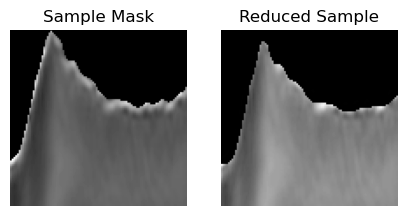

In [59]:
plt.figure(figsize=(5,5))
plt.subplot(121),plt.imshow(sample_mask,cmap = 'gray')
plt.title('Sample Mask'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(122),plt.imshow(reduced_sample,cmap = 'gray')
plt.title('Reduced Sample'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()


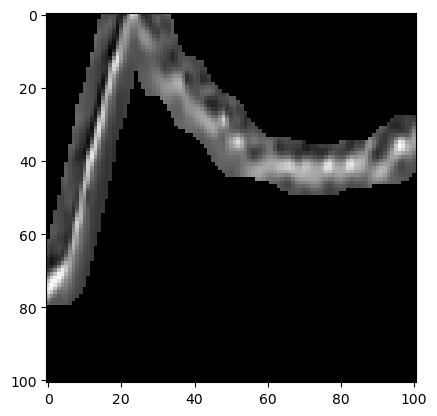

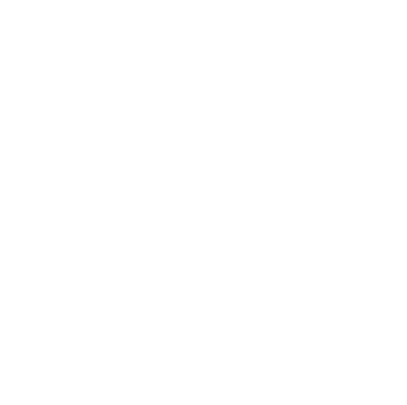

In [61]:
dilated_edge_sample = sample * dilated_edge
# Displaying the dilated_edge_sample
plt.imshow(dilated_edge_sample,cmap = 'gray')
plt.figure(figsize=(5,5))
plt.axis('off')
plt.show()

In [24]:
sample_semantic_mask = sample_semantic_mask /255

In [25]:
sample1 = sample * sample_semantic_mask # to only look inside the semantic template
sample2 = sample - dilated_edge

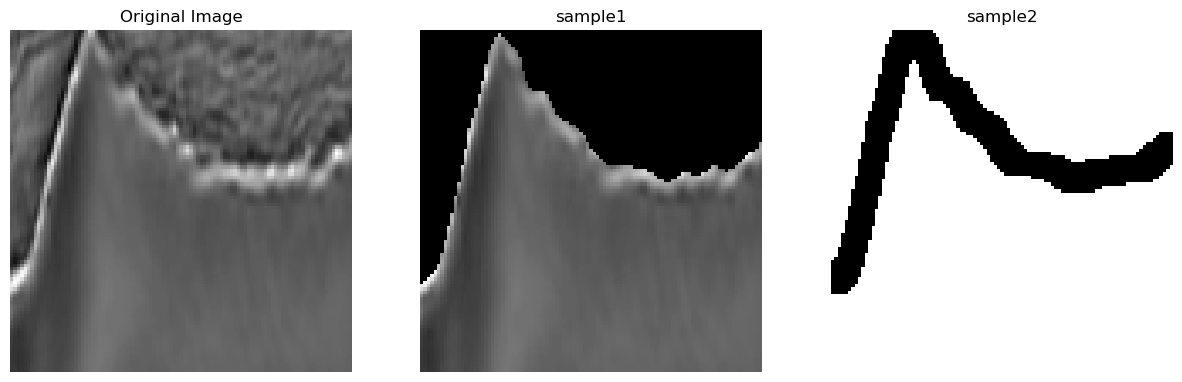

In [26]:
#show 3 columns
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(sample,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(132),plt.imshow(sample1,cmap = 'gray')
plt.title('sample1'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.subplot(133),plt.imshow(sample2,cmap = 'gray')
plt.title('sample2'), plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.show()
